<a href="https://colab.research.google.com/github/SebasLion/Simulacion_1_Sebas/blob/main/Buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento de la aguja de Buffon

El experimento de la aguja de Buffon es un famoso problema geométrico y estadístico que se utiliza para estimar el valor de $ \pi $ mediante métodos probabilísticos. Fue propuesto por el matemático francés Georges-Louis Leclerc, conde de Buffon, en el siglo XVIII.

## Descripción del experimento

Imaginemos un piso con líneas paralelas dibujadas a una distancia $d$ una de otra. Si lanzamos una aguja de longitud $l$ sobre este piso de manera aleatoria, queremos determinar la probabilidad de que la aguja cruce una de las líneas dibujadas.

## Formulación matemática

La probabilidad de que la aguja cruce una línea está dada por la fórmula:

$$ P = \frac{2 \cdot l}{\pi d} $$

donde $l$ es la longitud de la aguja y  $d$ es la distancia entre las líneas en el piso.

A partir de esta fórmula, podemos despejar $ \pi $ para obtener una estimación:

$$
\pi \approx \frac{2l}{P \cdot d}
$$

## Implementación del experimento

Para llevar a cabo el experimento de la aguja de Buffon, seguimos los siguientes pasos:


  1. Dibujamos líneas paralelas en un piso a una distancia $d$ una de otra.
  2. Lanzamos una aguja de longitud $ l $ varias veces sobre el piso de manera aleatoria.
  3. Registramos cuántas veces la aguja cruza una de las líneas.
  4. Calculamos la probabilidad $ P $ de que la aguja cruce una línea.
  5. Estimamos $ \pi $ utilizando la fórmula inversa.

## Importancia y aplicaciones

El experimento de la aguja de Buffon es relevante en la teoría de la probabilidad y proporciona una manera ingeniosa de estimar constantes matemáticas importantes como $ \pi $. Además de su relevancia histórica y académica, tiene aplicaciones en la educación matemática y la enseñanza de conceptos estadísticos básicos.



# Analíticamente

Para resolver el problema de manera analítica, podemos utilizar el concepto de probabilidad condicional y geometría:

1. **Geometría del problema:**

  La aguja puede caer de varias maneras sobre el piso, pero lo más crucial es cómo se relaciona su posición y orientación con las líneas paralelas.
    
2. **Cálculo de la probabilidad de cruce:**

  Si la aguja se lanza aleatoriamente sobre el piso, la probabilidad de que cruce una línea depende de la posición del centro de la aguja $x$ (la distancia desde el centro de la aguja hasta la línea más cercana) y del ángulo $\theta$ que forma la aguja con las líneas.
    
3. **Probabilidad condicional:**

  La probabilidad de que la aguja cruce una línea dada una posición $x$ y un ángulo $\theta$ está dada por:
  $$ P(\text{cruce} \mid x, \theta) = \frac{2l \cos(\theta)}{d} $$
  donde $\theta \in [0, \pi/2]$ y $x \in [0, d/2]$.

4. **Integración sobre todas las posibles posiciones y ángulos:**

  Para obtener la probabilidad total de que la aguja cruce una línea, integramos sobre todas las posibles posiciones y ángulos:
  $$ P(\text{cruce}) = \int_{0}^{d/2} \int_{0}^{\pi/2} P(\text{cruce} \mid x, \theta) \cdot \frac{2}{\pi} \, d\theta \, dx $$
  donde $\frac{2}{\pi}$ es el factor de normalización que asegura que la distribución de $\theta$ esté correctamente ponderada.
    
5. **Simplificación de la integral:**
  Al resolver la integral, podemos llegar a la fórmula para la probabilidad de cruce:
  $$ P(\text{cruce}) = \frac{2l}{\pi d} $$
    
6. **Estimación de $\pi$:**

  A partir de la fórmula anterior, podemos despejar $\pi$ para obtener una estimación:
  $$ \pi \approx \frac{2l}{P \cdot d} $$
  donde $P$ es la probabilidad de que la aguja cruce una línea.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def simular_experimento(num_simulaciones, num_lanzamientos, l, d):
    """
    Simula el experimento de la aguja de Buffon para estimar pi.
    """
    pi_estimados = []

    for _ in range(num_simulaciones):
        cruces = 0

        # Simular el lanzamiento de la aguja num_lanzamientos veces
        for _ in range(num_lanzamientos):
            # Generar posición aleatoria de la aguja (centro de la aguja y ángulo)
            x_center = np.random.uniform(0, d/2)  # Posición x del centro de la aguja
            theta = np.random.uniform(0, np.pi/2)  # Ángulo de la aguja respecto a las líneas

            # Calcular extremo de la aguja en el eje x
            x_end = x_center - (l/2) * np.cos(theta)

            # Verificar si la aguja cruza una línea
            if x_end < 0 or x_end > d/2:
                cruces += 1

        # Calcular la estimación de pi para esta simulación
        if cruces > 0:
            pi_estimado = (2 * l * num_lanzamientos) / (cruces * d)
            pi_estimados.append(pi_estimado)

    return pi_estimados


In [41]:
def graficar_histograma(pi_estimados):
    """
    Genera un histograma de las estimaciones de pi obtenidas.
    - pi_estimados: Lista de estimaciones de pi obtenidas en cada simulación.
    """
    plt.hist(pi_estimados, bins=500, edgecolor='black')
    plt.title('Histograma de estimaciones de pi')
    plt.xlabel('Valor estimado de pi')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()


In [42]:
# Parámetros del experimento
num_simulaciones = 1000  # Número de simulaciones del experimento
num_lanzamientos = 1000  # Número de lanzamientos de la aguja en cada simulación
l = 1.0  # Longitud de la aguja
d = 2.0  # Distancia entre líneas paralelas en el piso

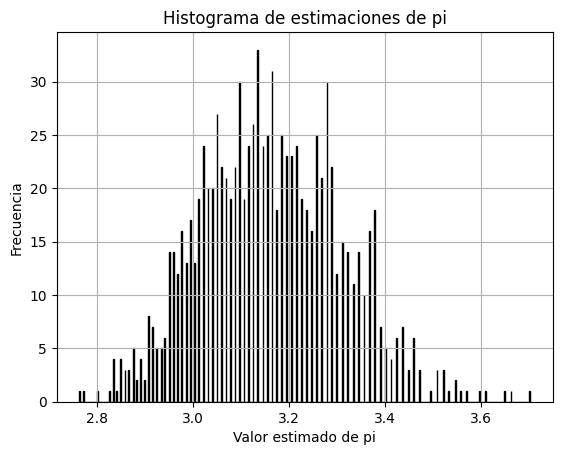

In [43]:
# Simular el experimento
pi_estimados = simular_experimento(num_simulaciones, num_lanzamientos, l, d)
# Graficar histograma de las estimaciones de pi
graficar_histograma(pi_estimados)